# Lesson 9
### Questions

1. The tips.csv dataset contains data on tips collected from a restaurant.
a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.
b. Repeat part a, but broken down by time.
2. Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7).
3. Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num.
4. Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of $20, we will simply look at all total bills near $20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of this function will be the predicted tip amount.
5. Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount.
### Responses

In [14]:
#1. I'm loading in the dataset
Tips=Table.read_table('tips.csv')
Tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [27]:
#a. Calculating the average tip of each sex
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
Males=Tips.where('sex',are.equal_to('Male')).column("tip")
Females=Tips.where('sex',are.equal_to('Female')).column("tip")
print("The average tips for males was $",np.average(Males))
print("The average tips for females was $",np.average(Females))

The average tips for males was $ 3.0896178343949043
The average tips for females was $ 2.8334482758620685


C:\Users\C20Elijah.Evers\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


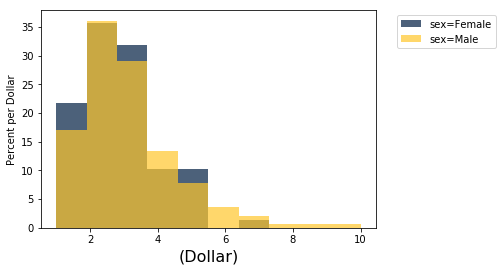

In [30]:
# Making a hiatogram of the tips
Tips.hist("tip",group="sex",unit="Dollar")

In [33]:
#b. Finding the average tip for lunch and dinner
Dinner=Tips.where('time',are.equal_to('Dinner')).column("tip")
Lunch=Tips.where('time',are.equal_to('Lunch')).column("tip")

print("The average tips for dinner was $",np.average(Dinner))
print("The average tips for lunch was $",np.average(Lunch))

The average tips for dinner was $ 3.102670454545454
The average tips for lunch was $ 2.728088235294118


C:\Users\C20Elijah.Evers\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


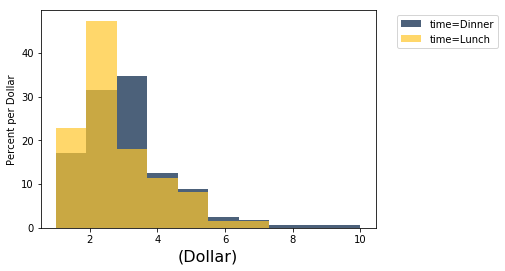

In [36]:
# Putting the tips by time of meal into a histogram
Tips.hist("tip",group="time",unit="Dollar")

In [41]:
#2. Creating a function to convert Name of Day into a number
def weekday_to_num(Day):
    if Day=="Mon":
        return 1
    elif Day=="Tues":
        return 2
    elif Day=="Wed":
        return 3
    elif Day=="Thur":
        return 4
    elif Day=="Fri":
        return 5
    elif Day=="Sat":
        return 6
    elif Day=="Sun":
        return 7

In [42]:
# 3. Applying the function in 2 to the table Tips
Tips.with_column("weekday_num",Tips.apply(weekday_to_num,"day"))

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


In [46]:
# 4. Creating the function to estimate the tip
def est_tip(Amount,Range):
    return np.average(Tips.where("total_bill",are.strictly_between(Amount-Range,Amount+Range)).column("tip"))

In [49]:
# 5. Applying the function in 4 to the Table
Tips=Tips.with_column("estimated tip",Tips.apply(est_tip,"total_bill",1))
Tips

total_bill,tip,sex,smoker,day,time,size,estimated tip
16.99,1.01,Female,No,Sun,Dinner,2,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,3.19813
23.68,3.31,Male,No,Sun,Dinner,2,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,3.67526
8.77,2,Male,No,Sun,Dinner,2,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,2.46231


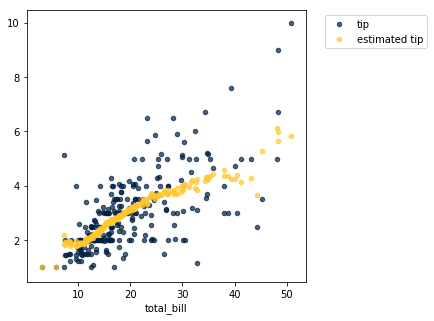

In [50]:
# Comparing the estimated tip to the actual tip via scatter plot
Tips.select(0,1,7).scatter(0)